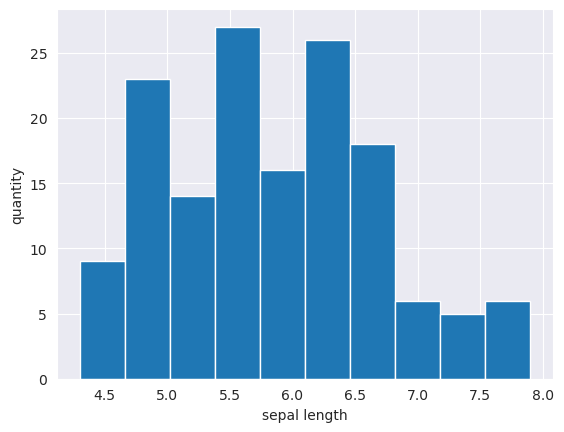

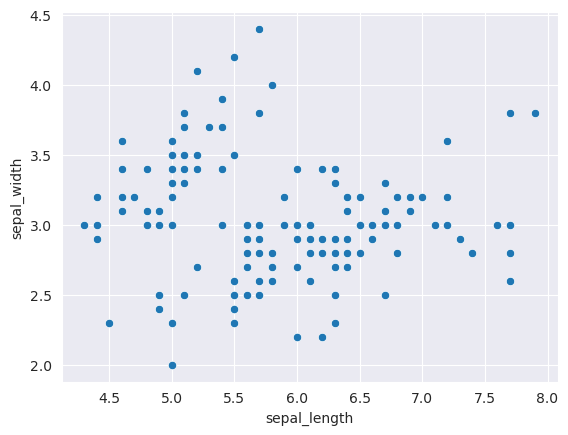

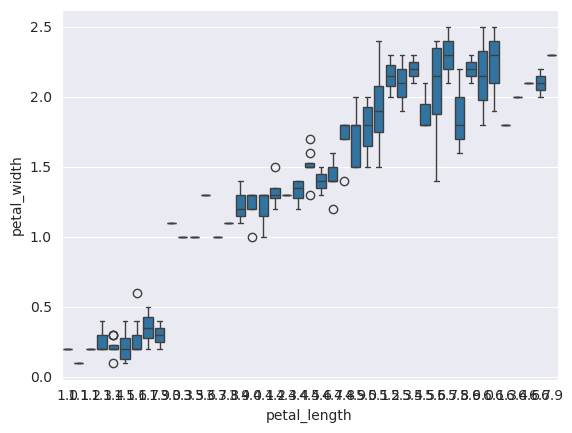

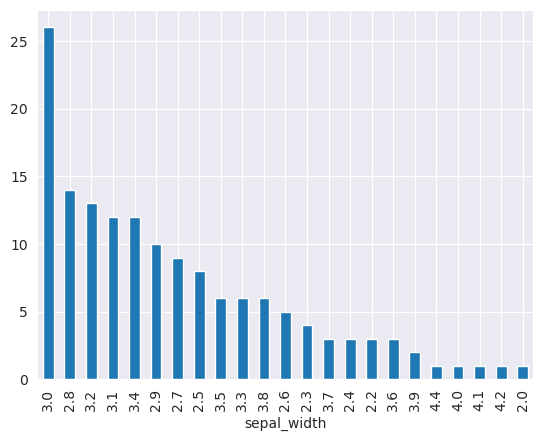

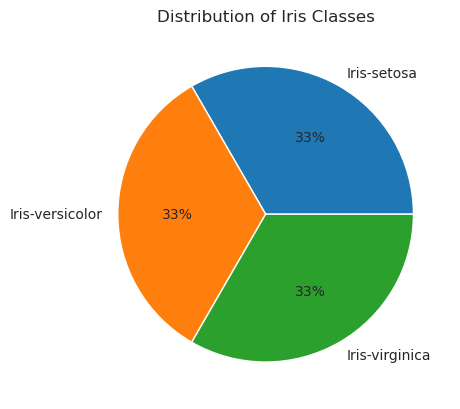

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from scipy.cluster.hierarchy import linkage, dendrogram


# loading dataset and basic visualizations
data = pd.read_csv('iris/iris.data', header=None,
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# histogram
plt.xlabel('sepal length')
plt.ylabel('quantity')
data['sepal_length'].hist()
plt.show()

# scatter plot
sns.scatterplot(x='sepal_length', y='sepal_width', data=data)
plt.show()

# box plot
sns.boxplot(x='petal_length', y='petal_width', data=data)
plt.show()

# bar plot
data['sepal_width'].value_counts().plot(kind="bar")
plt.show()

# pie chart
class_counts = data['class'].value_counts()
plt.title('Distribution of Iris Classes')
plt.pie(class_counts, labels=class_counts.index, autopct='%1.0f%%')
plt.show()


In [19]:
### preprocessing

# normalizing the data
scaler = MinMaxScaler()
data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(
    data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# encoding categorical data ( one-hot (non-ordinal) )
data_encoded = pd.get_dummies(data=data, columns=['class'])

print(data_encoded.head())

   sepal_length  sepal_width  petal_length  petal_width  cluster  \
0      0.222222     0.625000      0.067797     0.041667        0   
1      0.166667     0.416667      0.067797     0.041667        0   
2      0.111111     0.500000      0.050847     0.041667        0   
3      0.083333     0.458333      0.084746     0.041667        0   
4      0.194444     0.666667      0.067797     0.041667        0   

   kmeans_cluster  dbscan_cluster  class_Iris-setosa  class_Iris-versicolor  \
0               1               0               True                  False   
1               1               0               True                  False   
2               1               0               True                  False   
3               1               0               True                  False   
4               1               0               True                  False   

   class_Iris-virginica  
0                 False  
1                 False  
2                 False  
3           

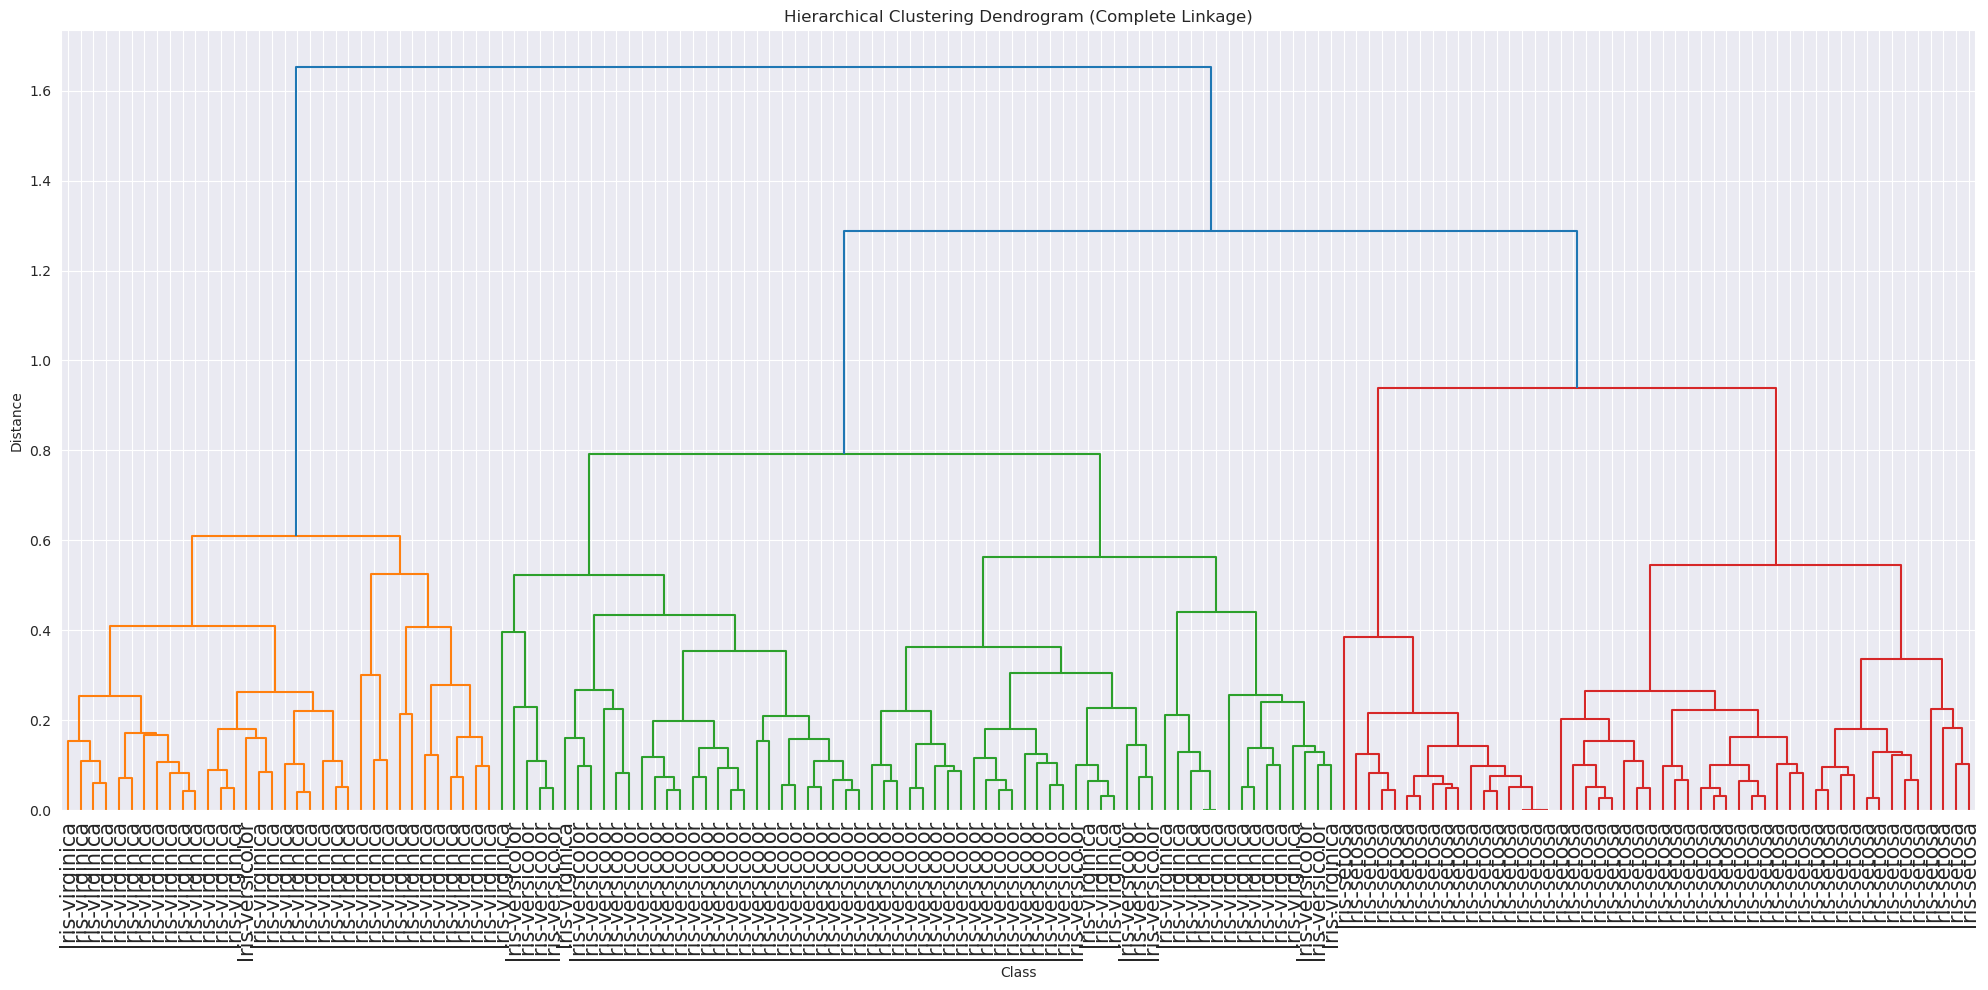

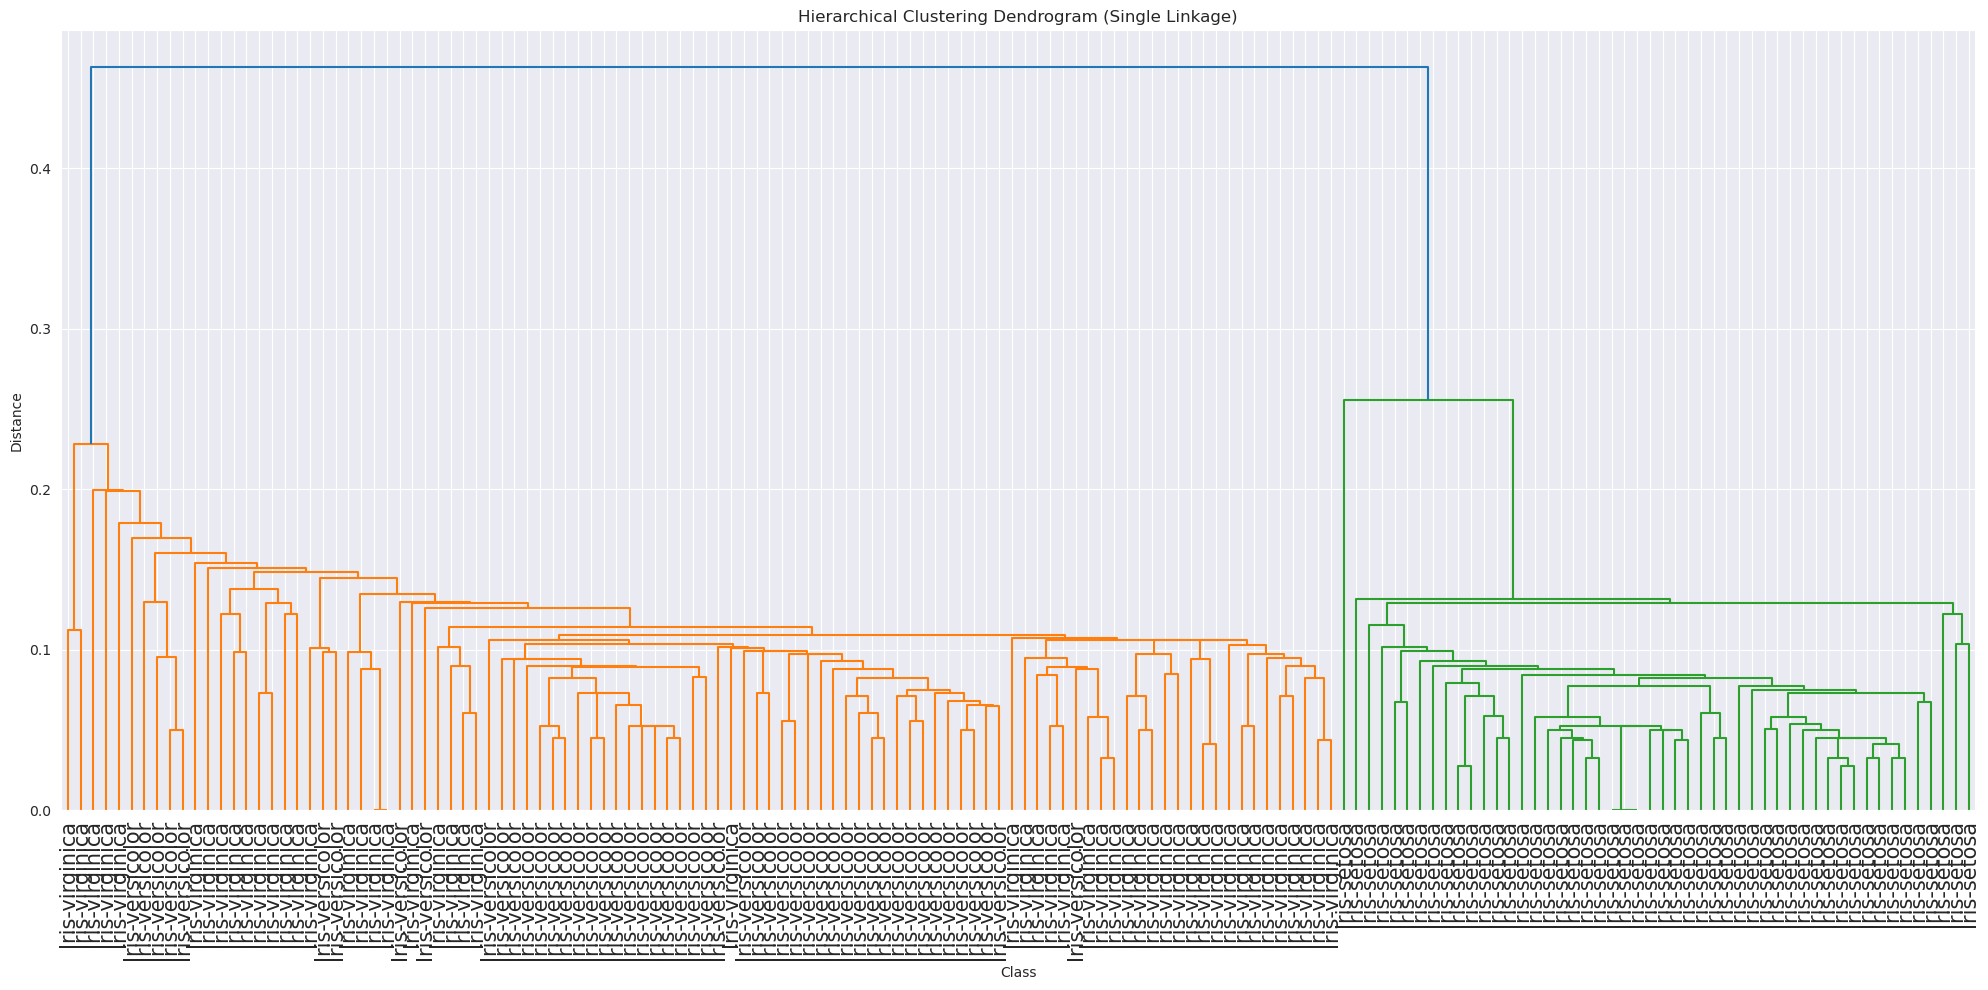

In [4]:
### clustering

## hierarchical
#numeric features
numeric_features = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# CLINK
complete_linkage_matrix = linkage(numeric_features, method='complete', metric='euclidean')
# SLINK
single_linkage_matrix = linkage(numeric_features, method='single', metric='euclidean')

# visualize CLINK
plt.figure(figsize=(20, 10))
dendrogram(complete_linkage_matrix, labels=data['class'].values, leaf_rotation=90, leaf_font_size=15)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Class')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()
# visualize SLINK
plt.figure(figsize=(20, 10))
dendrogram(single_linkage_matrix, labels=data['class'].values, leaf_rotation=90, leaf_font_size=15)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Class')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

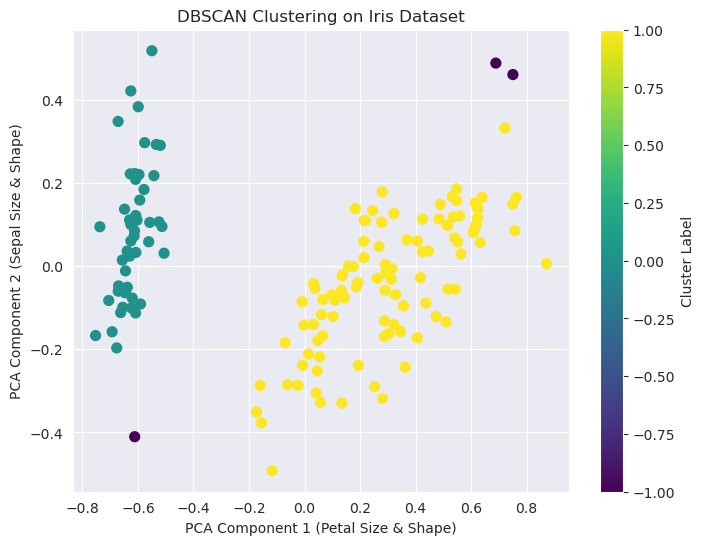

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

### clustering

## density based clustering ( density based spatial clustering of applications with noise aka. DBSCAN )

numeric_features_values = numeric_features.values

dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean').fit(numeric_features_values)
dbscan_cluster = dbscan.fit_predict(numeric_features_values)

data['dbscan_cluster'] = dbscan_cluster

# reduce from 4 dimensions to 2
pca = PCA(n_components=2)
reduced_features_dbscan = pca.fit_transform(numeric_features_values)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_features_dbscan[:, 0], reduced_features_dbscan[:, 1], c=dbscan_cluster, cmap='viridis', s=50)
plt.title('DBSCAN Clustering on Iris Dataset')
plt.xlabel('PCA Component 1 (Petal Size & Shape)')
plt.ylabel('PCA Component 2 (Sepal Size & Shape)')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


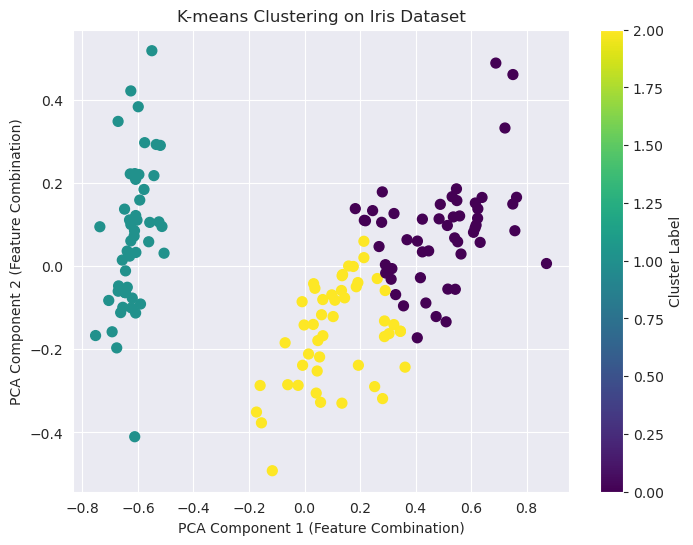

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## clustering
# partition based ( KMeans )
# 3 classes of plants => 3 partitions
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans_cluster = kmeans.fit_predict(numeric_features_values)
data['kmeans_cluster'] = kmeans_cluster

# visualization
pca = PCA(n_components=2)
reduced_features_kmeans = pca.fit_transform(numeric_features_values)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_features_kmeans[:, 0], reduced_features_kmeans[:, 1], c=kmeans_cluster, cmap='viridis', s=50)


plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('PCA Component 1 (Feature Combination)')
plt.ylabel('PCA Component 2 (Feature Combination)')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


In [18]:
### clusters internal metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
import numpy as np

# flatten the hierarchical clusters for silhouette score
from scipy.cluster.hierarchy import fcluster

complete_linkage_labels = fcluster(complete_linkage_matrix,t=3,criterion='maxclust')
single_linkage_labels = fcluster(single_linkage_matrix,t=3,criterion='maxclust')

def measure_internal_metrics(features,labels,method_name):
    try:
        silhouette_avg = silhouette_score(features,labels)
        db_index = davies_bouldin_score(features,labels)
        ch_score = calinski_harabasz_score(features,labels)
        print(f"\n### {method_name} Clustering ###")
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Davies-Bouldin Index: {db_index:.4f}")
        print(f"Calinski-Harabasz Index: {ch_score:.4f}")
    except ValueError as e:
        print(f"\n### {method_name} Clustering ###")
        print(f"Error: {e} (likely due to insufficient clusters or noise points)")
        print("Ensure the clustering method generated at least two clusters.")



# K-Means Clusters
measure_internal_metrics(numeric_features, kmeans_cluster, "K-Means")

# DBSCAN Clusters
measure_internal_metrics(numeric_features, dbscan_cluster, "DBSCAN")

# Complete Linkage Hierarchical Clusters
measure_internal_metrics(numeric_features, complete_linkage_labels, "Complete Linkage")

# Single Linkage Hierarchical Clusters
measure_internal_metrics(numeric_features, single_linkage_labels, "Single Linkage")



### K-Means Clustering ###
Silhouette Score: 0.4825
Davies-Bouldin Index: 0.7875
Calinski-Harabasz Index: 350.0614

### DBSCAN Clustering ###
Silhouette Score: 0.5553
Davies-Bouldin Index: 3.1179
Calinski-Harabasz Index: 164.1254

### Complete Linkage Clustering ###
Silhouette Score: 0.5031
Davies-Bouldin Index: 0.7521
Calinski-Harabasz Index: 349.1719

### Single Linkage Clustering ###
Silhouette Score: 0.5309
Davies-Bouldin Index: 0.4265
Calinski-Harabasz Index: 180.5726


In [44]:
from sklearn.model_selection import train_test_split
### classification

# splitting data

# Features and labels
X = data_encoded[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data_encoded[['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica']]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# train the model
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

# predict
y_pred_dt = dt_model.predict(X_test)

print("### Decision Tree Classifier ###")
print(classification_report(y_test, y_pred_dt, target_names=['setosa', 'versicolor', 'virginica']))
print("Confusion Matrix:")
print(confusion_matrix(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1)))

### Decision Tree Classifier ###
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 samples avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [47]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Wrap the Naive Bayes model
multi_nb_model = MultiOutputClassifier(GaussianNB())

# Fit the model
multi_nb_model.fit(X_train, y_train)

# Predict (will return the same shape as y_test: one-hot encoded predictions)
y_pred = multi_nb_model.predict(X_test)

# Example evaluation
print("One-hot encoded predictions:")
print(y_pred)

# Optional: Convert predictions back to class labels for evaluation
y_test_labels = y_test.idxmax(axis=1)
y_pred_labels = pd.DataFrame(y_pred, columns=y_train.columns).idxmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))


One-hot encoded predictions:
[[False  True False]
 [ True False False]
 [False False  True]
 [False  True False]
 [False  True  True]
 [ True False False]
 [False  True False]
 [False False  True]
 [False  True False]
 [False  True False]
 [False False  True]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False False  True]
 [False False  True]
 [False  True False]
 [False  True False]
 [False False  True]
 [ True False False]
 [False False  True]
 [ True False False]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False  True False]
 [ True False False]
 [ True False False]
 [False False  True]
 [False  True  True]
 [ True False False]
 [ True False False]
 [ True False False]
 [False False  True]
 [False False False]
 [False  True  True]
 [ True False False]
 [ True False False]]

Classification Report:
 